In [74]:
import pandas as pd
import numpy as np

In [76]:
ct_sponsors = pd.read_csv('../data_cleaning/processed_data/sponsor_data.csv')
exp = pd.read_csv('../data_ingest/raw_data/expanded_stock_lkup.csv')
yf_sponsors = pd.read_csv('../data_ingest/raw_data/merged_stock_data.csv')
yf_sponsors_1 = pd.read_csv('../data_ingest/raw_data/merged_stock_data_1.csv')
fda_drugs = pd.read_csv('../data_cleaning/processed_data/filtered_drugs.csv')
hist = pd.read_csv('../data_cleaning/processed_data/price_changes.csv')

In [79]:
a = exp.company_ct.unique()
b = yf_sponsors_1.company_ct.unique()
np.setxor1d(a, b)

array(['AB Science', 'AMAG Pharmaceuticals, Inc.', 'AMCG',
       'ARCA Biopharma, Inc.', 'AVEO Pharmaceuticals, Inc.',
       'Acasti Pharma Inc.', 'Acer Therapeutics Inc.', 'Achaogen, Inc.',
       'Adamas Pharmaceuticals, Inc.',
       'Adamis Pharmaceuticals Corporation', 'Aduro Biotech, Inc.',
       'Aimmune Therapeutics, Inc.', 'Akorn, Inc.', 'Akouos, Inc.',
       'Alder Biopharmaceuticals, Inc.', 'Alexion Pharmaceuticals, Inc.',
       'Allergan', 'Alpine Immune Sciences, Inc.', 'Amedica Corporation',
       'Apollo Endosurgery, Inc.', 'Aravive, Inc.', 'Astellas Pharma Inc',
       'Astex Pharmaceuticals, Inc.', 'Athenex, Inc.', 'Atreca, Inc.',
       'Aura', 'Avon Products, Inc.', 'Aziyo Biologics, Inc.',
       'BTL Industries Ltd.', 'Beam', 'BioCardia, Inc.',
       'Bioblast Pharma Ltd.', 'Biocept, Inc.',
       'BiondVax Pharmaceuticals ltd.', 'CSL Behring', 'CTI BioPharma',
       'Carl Zeiss Meditec AG', 'Celgene', 'Celgene Corporation',
       'Chiasma, Inc.', 'Clement

In [26]:
len(ct_sponsors.company_ct.unique())

14218

In [78]:
len(yf_sponsors_1.company_ct.unique())

286

In [64]:
yf_sponsors[yf_sponsors['company_ct'] == 'Cassava Sciences, Inc.'].head()

,date_stock,company_ct,ticker,closing_price
482709,2014-01-10,"Cassava Sciences, Inc.",SAVA,36.820000
482710,2014-01-13,"Cassava Sciences, Inc.",SAVA,35.910000
482711,2014-01-14,"Cassava Sciences, Inc.",SAVA,35.840000
482712,2014-01-15,"Cassava Sciences, Inc.",SAVA,30.730000
482713,2014-01-16,"Cassava Sciences, Inc.",SAVA,32.130001


In [77]:
len(yf_sponsors.company_ct.unique())

264

In [36]:
len(fda_drugs.matched_drug_names.unique())

246

In [37]:
fda_drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2299 entries, 0 to 2298
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ct_id                      2299 non-null   object
 1   fda_id                     2299 non-null   object
 2   fda_company                2299 non-null   object
 3   matched_drug_names         2299 non-null   object
 4   ct_date                    2299 non-null   object
 5   fda_date                   2220 non-null   object
 6   ct_phase                   2172 non-null   object
 7   fda_brand                  2299 non-null   object
 8   fda_generic                2299 non-null   object
 9   fda_active                 2299 non-null   object
 10  ct_name                    2299 non-null   object
 11  ct_otherNames              2299 non-null   object
 12  normalized_fda_drug_names  2299 non-null   object
dtypes: object(13)
memory usage: 233.6+ KB


In [39]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ct_id                      96 non-null     object 
 1   fda_id                     96 non-null     object 
 2   fda_company                96 non-null     object 
 3   matched_drug_names         96 non-null     object 
 4   ct_date                    96 non-null     object 
 5   fda_date                   96 non-null     object 
 6   ct_phase                   96 non-null     object 
 7   fda_brand                  96 non-null     object 
 8   fda_generic                96 non-null     object 
 9   fda_active                 96 non-null     object 
 10  ct_name                    96 non-null     object 
 11  ct_otherNames              96 non-null     object 
 12  normalized_fda_drug_names  96 non-null     object 
 13  ct_avg_price               96 non-null     float64
 

<Axes: >

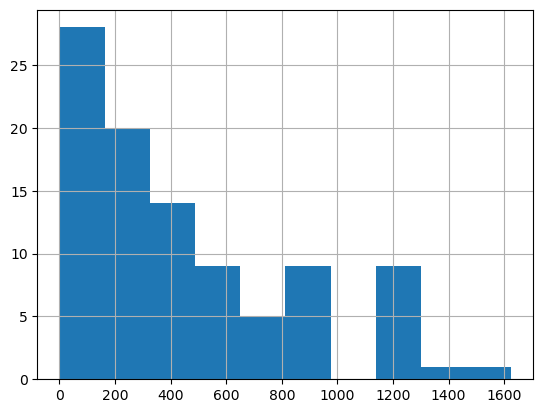

In [49]:
hist[['fda_date','ct_date']] = hist[['fda_date','ct_date']].apply(pd.to_datetime)
hist['days_between'] = (hist['fda_date'] - hist['ct_date']).dt.days
hist.days_between.hist()

In [59]:
hist.sort_values(by="price_pct_change", ascending=False).head(10)

,ct_id,fda_id,fda_company,matched_drug_names,ct_date,fda_date,ct_phase,fda_brand,fda_generic,fda_active,ct_name,ct_otherNames,normalized_fda_drug_names,ct_avg_price,fda_avg_price,price_pct_change,profit_or_loss,days_between
64,NCT05500222,NDA217785,"Madrigal Pharmaceuticals, Inc.",resmetirom,2022-08-15,2024-03-14,['PHASE3'],"['REZDIFFRA', 'REZDIFFRA', 'REZDIFFRA']",['RESMETIROM'],"['RESMETIROM', 'RESMETIROM', 'RESMETIROM']","['Resmetirom', 'Placebo']",['MGL-3196'],"rezdiffra, resmetirom",73.731667,262.851667,256.497661,189.120000,577
95,NCT05270525,NDA217389,Verona Pharma plc,ensifentrine,2022-03-08,2024-06-26,['PHASE2'],['OHTUVAYRE'],['ENSIFENTRINE'],['ENSIFENTRINE'],"['Ensifentrine', 'Placebo']",[],"ohtuvayre, ensifentrine",4.928333,15.211667,208.657420,10.283333,841
29,NCT03598036,NDA213716,Aurinia Pharmaceuticals Inc.,voclosporin,2018-07-26,2021-01-22,['PHASE2'],['LUPKYNIS'],['VOCLOSPORIN'],['VOCLOSPORIN'],['Voclosporin'],[],"lupkynis, voclosporin",5.491667,16.841666,206.676780,11.350000,911
63,NCT03249376,NDA209500,"Intra-Cellular Therapies, Inc.",lumateperone,2017-08-15,2019-12-20,['PHASE3'],"['CAPLYTA', 'CAPLYTA', 'CAPLYTA']",['LUMATEPERONE'],"['LUMATEPERONE TOSYLATE', 'LUMATEPERONE TOSYLA...","['Lumateperone', 'Placebo']",['ITI-007'],"caplyta, lumateperone, lumateperone tosylate",11.321667,31.869000,181.486821,20.547333,857
12,NCT04750226,NDA216962,AbbVie,"foscarbidopa, foslevodopa",2021-02-11,2024-10-16,['PHASE3'],['VYALEV'],['FOSCARBIDOPA/FOSLEVODOPA'],"['FOSCARBIDOPA', 'FOSLEVODOPA']",['ABBV-951'],"['Foscarbidopa', 'Foslevodopa']","foscarbidopa, vyalev, foslevodopa",104.948000,188.511668,79.623879,83.563668,1343
27,NCT04159519,NDA216579,AstraZeneca,budesonide,2019-11-12,2023-04-28,['PHASE4'],['SYMBICORT AEROSPHERE'],[],"['BUDESONIDE', 'FORMOTEROL FUMARATE']","['Symbicort®', 'Fasenra®', 'Ventolin®']","['budesonide/formoterol', 'benralizumab', 'sal...","symbicort aerosphere, budesonide, formoterol f...",47.553333,74.109998,55.846066,26.556665,1263
94,NCT05387083,NDA217603,"Tarsus Pharmaceuticals, Inc.",lotilaner,2022-05-24,2023-07-24,['PHASE2'],['XDEMVY'],['LOTILANER OPHTHALMIC SOLUTION'],['LOTILANER'],"['Low Dose TP-05', 'High Dose TP-05', 'Placebo...","['Lotilaner', 'Lotilaner', 'Placebo']","lotilaner, xdemvy, lotilaner ophthalmic solution",14.230000,21.634167,52.032093,7.404167,426
25,NCT04159519,NDA214070,AstraZeneca,budesonide,2019-11-12,2023-01-10,['PHASE4'],['AIRSUPRA'],['ALBUTEROL SULFATE AND BUDESONIDE'],"['ALBUTEROL SULFATE', 'BUDESONIDE']","['Symbicort®', 'Fasenra®', 'Ventolin®']","['budesonide/formoterol', 'benralizumab', 'sal...","albuterol sulfate, airsupra, budesonide",47.553333,70.789999,48.864434,23.236667,1155
89,NCT04429503,BLA761355,Regeneron Pharmaceuticals,aflibercept,2020-06-12,2023-08-18,"['PHASE2', 'PHASE3']",['EYLEA HD'],['AFLIBERCEPT'],['AFLIBERCEPT'],"['aflibercept', 'High-dose aflibercept']","['EYLEA®', 'BAY86-5321']","eylea hd, aflibercept",602.704997,833.295003,38.259183,230.590007,1162
76,NCT03627767,NDA213871,Pfizer,abrocitinib,2018-08-13,2022-01-14,['PHASE3'],"['CIBINQO', 'CIBINQO', 'CIBINQO']",['ABROCITINIB'],"['ABROCITINIB', 'ABROCITINIB', 'ABROCITINIB']","['PF-04965842 100 mg', 'PF-04965842 200 mg', '...","['Abrocitinib', 'Abrocitinib']","cibinqo, abrocitinib",39.297912,53.888000,37.126880,14.590089,1250


In [58]:
# cols = [0, 1, 2, 3, 15]
hist.iloc[:, cols].sort_values(by="price_pct_change", ascending=False).head(10)

,ct_id,fda_id,fda_company,matched_drug_names,price_pct_change
64,NCT05500222,NDA217785,"Madrigal Pharmaceuticals, Inc.",resmetirom,256.497661
95,NCT05270525,NDA217389,Verona Pharma plc,ensifentrine,208.657420
29,NCT03598036,NDA213716,Aurinia Pharmaceuticals Inc.,voclosporin,206.676780
63,NCT03249376,NDA209500,"Intra-Cellular Therapies, Inc.",lumateperone,181.486821
12,NCT04750226,NDA216962,AbbVie,"foscarbidopa, foslevodopa",79.623879
27,NCT04159519,NDA216579,AstraZeneca,budesonide,55.846066
94,NCT05387083,NDA217603,"Tarsus Pharmaceuticals, Inc.",lotilaner,52.032093
25,NCT04159519,NDA214070,AstraZeneca,budesonide,48.864434
89,NCT04429503,BLA761355,Regeneron Pharmaceuticals,aflibercept,38.259183
76,NCT03627767,NDA213871,Pfizer,abrocitinib,37.126880


In [1]:
import json
import os
import pymongo
import gridfs
import sys

In [2]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['clinical_trials']

In [ ]:
file_path = "../data_ingest/raw_data/clinical_trials_raw.json"
raw_json = json.load(open(file_path))

In [ ]:
db.insert_many(raw_json)

In [ ]:
def setup_mongo(json_file, clear_existing=False):
    """Sets up MongoDB and loads the JSON file into GridFS."""
    try:
        client = pymongo.MongoClient(os.getenv("MONGODB_URI", "mongodb://localhost:27017/"))  # Use env var for flexibility
        db_name = os.getenv("MONGO_DB_NAME", "clinical_trials")  # Use env var for database name
        db = client[db_name]
        fs = gridfs.GridFS(db)

        # Optionally clear existing GridFS data
        if clear_existing:
            for file in fs.find():
                fs.delete(file._id)

        # Check if file already exists in GridFS
        filename = os.path.basename(json_file)
        existing_file = fs.find_one({"filename": filename})
        if existing_file:
            print(f"File '{filename}' already exists in GridFS. Skipping upload.")
            return db, fs, existing_file._id

        print("Uploading JSON data into GridFS...")
        with open(json_file, 'rb') as file:  # Open in binary mode for GridFS
            file_id = fs.put(file, filename=filename)

        print("Data upload complete.")
        return db, fs, file_id
    
    except Exception as e:
        print(f"Error setting up MongoDB: {e}")
        sys.exit(1)


if __name__ == "__main__":
    # Traverse to project root dynamically and locate the JSON file
    script_dir = os.path.dirname(os.path.abspath(__file__))
    project_root = os.path.abspath(os.path.join(script_dir, "../"))
    json_file_path = os.path.join(project_root, "data_ingest/raw_data/clinical_trials_raw.json")

    if not os.path.exists(json_file_path):
        print(f"JSON file not found: {json_file_path}")
        sys.exit(1)

    # Initialize MongoDB and load file into GridFS
    print("Initializing MongoDB...")
    db, fs, file_id = setup_mongo(json_file_path, clear_existing=False)
    print(f"MongoDB setup complete. File ID: {file_id}")

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/clinical_trials-completedDate_industry.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71915 entries, 0 to 71914
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   nct_id                         71915 non-null  object
 1   brief_title                    71915 non-null  object
 2   sponsor_name                   71915 non-null  object
 3   phases                         71915 non-null  object
 4   has_results                    71915 non-null  bool  
 5   overall_status                 71915 non-null  object
 6   primary_completion_date        71915 non-null  object
 7   study_first_post_date          71915 non-null  object
 8   url                            71915 non-null  object
 9   clean_primary_completion_date  71915 non-null  object
 10  is_phase4                      71915 non-null  int64 
dtypes: bool(1), int64(1), object(9)
memory usage: 5.6+ MB


In [3]:
df.head()

,nct_id,brief_title,sponsor_name,phases,has_results,overall_status,primary_completion_date,study_first_post_date,url,clean_primary_completion_date,is_phase4
0,NCT04128579,Study of EQ001 (Itolizumab) in Systemic Lupus ...,Equillium,['PHASE1'],False,COMPLETED,2023-11-16,2019-10-16,https://clinicaltrials.gov/study/NCT04128579,2023-11-16,0
1,NCT02312479,Safety and Performance Study of the Nyxoah SAT...,Nyxoah S.A.,['NA'],False,TERMINATED,2015-11,2014-12-09,https://clinicaltrials.gov/study/NCT02312479,2015-11-01,0
2,NCT03235479,Safety and Efficacy Study in Adult Subjects Wi...,Pfizer,['PHASE3'],True,COMPLETED,2018-01-21,2017-08-01,https://clinicaltrials.gov/study/NCT03235479,2018-01-21,0
3,NCT02840279,A Multiple Ascending Dose Study of BPN14770 in...,Tetra Discovery Partners,['PHASE1'],False,COMPLETED,2016-11,2016-07-21,https://clinicaltrials.gov/study/NCT02840279,2016-11-01,0
4,NCT03284879,Post-Marketing Surveillance Study of OTEZLA,Amgen,Unknown,False,COMPLETED,2021-10-31,2017-09-15,https://clinicaltrials.gov/study/NCT03284879,2021-10-31,0


In [6]:
# Strip whitespace and convert all dates, forcing "YYYY-MM" format into "YYYY-MM-01"
df['clean_primary_completion_date'] = (
    df['primary_completion_date']
    .str.strip()  # Remove any surrounding whitespace
    .apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d', errors='coerce') 
           if len(x) > 7 else pd.to_datetime(x + '-01', format='%Y-%m-%d'))
)

In [10]:
df['is_phase4'] = df['phases'].apply(lambda x: 1 if x.strip() == "['PHASE4']" else 0)

In [15]:
filtered_df = df[df['clean_primary_completion_date'] >= pd.Timestamp.now() - pd.DateOffset(years=10)]

In [16]:
filtered_df.is_phase4.value_counts()

is_phase4
0    69260
1     2566
Name: count, dtype: int64

In [17]:
len(filtered_df['sponsor_name'].unique())

11994

In [19]:
filtered_df['sponsor_name'].value_counts().head(50)

sponsor_name
Novartis Pharmaceuticals                            1412
Pfizer                                              1361
AstraZeneca                                         1355
GlaxoSmithKline                                     1013
Hoffmann-La Roche                                    948
Bayer                                                893
Eli Lilly and Company                                883
Bristol-Myers Squibb                                 828
Boehringer Ingelheim                                 792
AbbVie                                               738
Merck Sharp & Dohme LLC                              724
Janssen Research & Development, LLC                  671
Takeda                                               607
Novo Nordisk A/S                                     567
Sanofi                                               491
Jiangsu HengRui Medicine Co., Ltd.                   454
Amgen                                                453
Gilead Sciences   